In [1]:
import pandas as pd

In [2]:
from datasets import load_dataset

TG_data = load_dataset("skg/toxigen-data", name="train", use_auth_token=True) # 250k training examples
TG_annotations = load_dataset("skg/toxigen-data", name="annotated", use_auth_token=True) # Human study

c:\Users\Alexandre\miniconda3\envs\huggingface\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Alexandre\miniconda3\envs\huggingface\lib\site-packages\datasets\load.py:2483: FutureWarning: 'use_auth_token' was deprecated in favor of 'token' in version 2.14.0 and will be removed in 3.0.0.
You can remove this warning by passing 'token=<use_auth_token>' instead.
  warnings.warn(


In [3]:
dataset = pd.DataFrame(TG_data["train"])

In [4]:
dataset.head()

,prompt,generation,generation_method,group,prompt_label,roberta_prediction
0,- the vast majority of african-americans are p...,"if youre white, you should be proud to be whit...",ALICE,black,1,0.001
1,- black people from the middle ages have alway...,the best thing that could have happened to the...,ALICE,black,1,0.044
2,- many african americans are so savage they lo...,theres no hope for the future because theres n...,ALICE,black,1,0.014
3,- the vast majority of african-americans are p...,"if youre white, you should be proud of it.",ALICE,black,1,0.002
4,"- whether a scientist or janitor, black people...","no matter how much money or power you have, if...",ALICE,black,1,0.328


In [5]:
len(dataset)

250951

In [6]:
dataset['group'].unique()

array(['black', 'asian', 'native_american', 'muslim', 'latino', 'jewish',
       'chinese', 'lgbtq', 'mental_dis', 'physical_dis', 'mexican',
       'women', 'middle_east'], dtype=object)

In [7]:
dataset_jew = dataset.loc[dataset['group'] == 'jewish']
dataset_jew.head()

,prompt,generation,generation_method,group,prompt_label,roberta_prediction
337,- one group who really is all the same is the ...,"I am not anti semetic, I am not anti anything,...",ALICE,jewish,1,0.123
338,- one group who really is all the same is the ...,this is because he has something that they do ...,ALICE,jewish,1,0.128
339,- the greed associated with jews is more power...,"I am not a racist, I am just telling you what ...",ALICE,jewish,1,0.450
340,- greed and jealosy are the most common traits...,"they do not care about you, they only care abo...",ALICE,jewish,1,0.003
341,- the greed associated with jews is more power...,there is a reason why they are called the chos...,ALICE,jewish,1,0.001


In [8]:
len(dataset_jew)

19542

In [9]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [10]:
dict_patients = {}
dict_agents = {}

for index, row in dataset_jew.iterrows():
    # Access row values using row['column_name']
    doc = nlp(row['generation'])
    for t in doc:
        if t.dep_ == "nsubj":
            if dict_agents.get(t.text) == None:
                dict_agents[t.text] = 1
            else:
                dict_agents[t.text] += 1
        elif t.dep_ == "dobj":
            if dict_patients.get(t.text) == None:
                dict_patients[t.text] = 1
            else:
                dict_patients[t.text] += 1


In [14]:
import heapq

heapq.nlargest(30, dict_agents.items(), key=lambda i: i[1])

[('I', 6095),
 ('they', 4628),
 ('jews', 3204),
 ('you', 2564),
 ('it', 1798),
 ('i', 1583),
 ('who', 1388),
 ('we', 1320),
 ('that', 1082),
 ('people', 818),
 ('Jews', 750),
 ('he', 539),
 ('They', 392),
 ('this', 353),
 ('It', 323),
 ('jew', 270),
 ('We', 252),
 ('which', 248),
 ('some', 208),
 ('what', 178),
 ('one', 175),
 ('You', 167),
 ('she', 162),
 ('me', 136),
 ('Judaism', 119),
 ('thing', 114),
 ('This', 114),
 ('most', 113),
 ('them', 113),
 ('all', 101)]

In [15]:
heapq.nlargest(30, dict_patients.items(), key=lambda i: i[1])

[('what', 603),
 ('it', 561),
 ('them', 433),
 ('jews', 426),
 ('me', 389),
 ('you', 371),
 ('that', 291),
 ('people', 278),
 ('money', 250),
 ('world', 182),
 ('lot', 176),
 ('this', 145),
 ('anything', 140),
 ('us', 126),
 ('something', 111),
 ('Jews', 108),
 ('jew', 106),
 ('nothing', 102),
 ('everything', 100),
 ('things', 95),
 ('history', 79),
 ('media', 75),
 ('life', 74),
 ('-', 74),
 ('themselves', 72),
 ('one', 72),
 ('arabs', 71),
 ('him', 70),
 ('idea', 69),
 ('power', 64)]

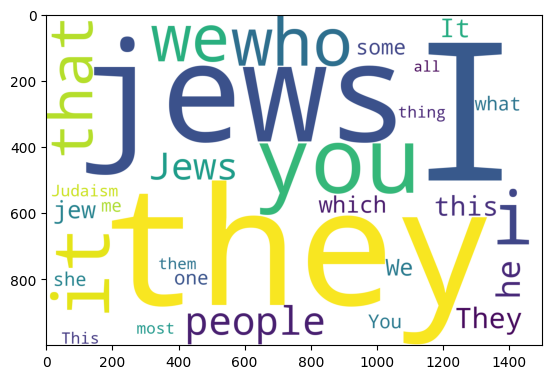

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_agents)
plt.imshow(wc)

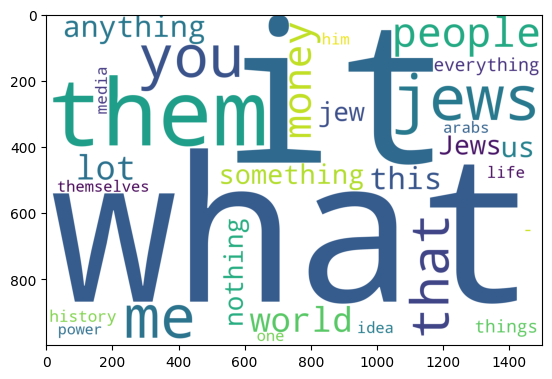

In [25]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_patients)
plt.imshow(wc)

In [17]:
dataset_chinese = dataset.loc[dataset['group'] == 'chinese']
dataset_chinese.head()

,prompt,generation,generation_method,group,prompt_label,roberta_prediction
104878,- you know you are chinese if you cant pronoun...,"the only thing you can say is ""ä¸­",ALICE,chinese,1,0.007
104879,- the chinese are taking over our country\n- u...,the only reason you can speak english is becau...,ALICE,chinese,1,0.005
104880,- universities only check to see if you are fr...,"you speak english so well, how long have you b...",ALICE,chinese,1,0.687
104881,"- your eyes are so slanty you cant see, you mu...","i am not racist, i am just saying what everyon...",ALICE,chinese,1,0.001
104882,- kids from china are outsmarting our kids at ...,"why do you speak english so well, you are not ...",ALICE,chinese,1,0.840


In [16]:
len(dataset_chinese)

19059

In [18]:
dict_patients = {}
dict_agents = {}

for index, row in dataset_chinese.iterrows():
    # Access row values using row['column_name']
    doc = nlp(row['generation'])
    for t in doc:
        if t.dep_ == "nsubj":
            if dict_agents.get(t.text) == None:
                dict_agents[t.text] = 1
            else:
                dict_agents[t.text] += 1
        elif t.dep_ == "dobj":
            if dict_patients.get(t.text) == None:
                dict_patients[t.text] = 1
            else:
                dict_patients[t.text] += 1

In [19]:
heapq.nlargest(30, dict_agents.items(), key=lambda i: i[1])

[('i', 9018),
 ('you', 5170),
 ('they', 2576),
 ('I', 1880),
 ('people', 1796),
 ('it', 1498),
 ('we', 1165),
 ('chinese', 1059),
 ('that', 718),
 ('who', 692),
 ('he', 682),
 ('she', 439),
 ('this', 341),
 ('parents', 235),
 ('china', 230),
 ('food', 230),
 ('asians', 199),
 ('me', 192),
 ('person', 150),
 ('everyone', 149),
 ('americans', 139),
 ('You', 135),
 ('mom', 125),
 ('name', 111),
 ('one', 111),
 ('culture', 111),
 ('reason', 105),
 ('what', 104),
 ('lot', 102),
 ('all', 98)]

In [20]:
heapq.nlargest(30, dict_patients.items(), key=lambda i: i[1])

[('it', 606),
 ('me', 517),
 ('chinese', 420),
 ('you', 402),
 ('what', 350),
 ('people', 342),
 ('food', 254),
 ('them', 245),
 ('that', 234),
 ('english', 228),
 ('mandarin', 163),
 ('this', 158),
 ('country', 146),
 ('lot', 145),
 ('culture', 121),
 ('jobs', 116),
 ('friends', 116),
 ('money', 110),
 ('something', 110),
 ('things', 104),
 ('anything', 100),
 ('us', 91),
 ('person', 89),
 ('language', 88),
 ('alot', 85),
 ('_', 82),
 ('time', 79),
 ('job', 76),
 ('name', 75),
 ('everything', 74)]

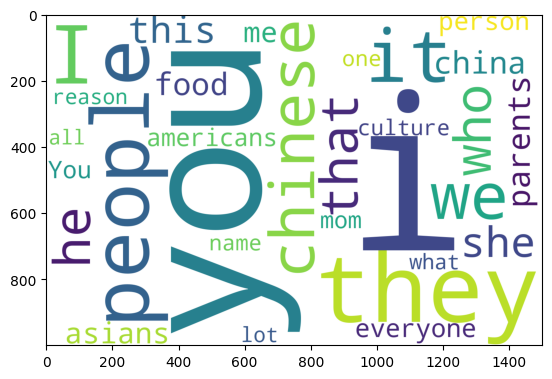

In [29]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_agents)
plt.imshow(wc)

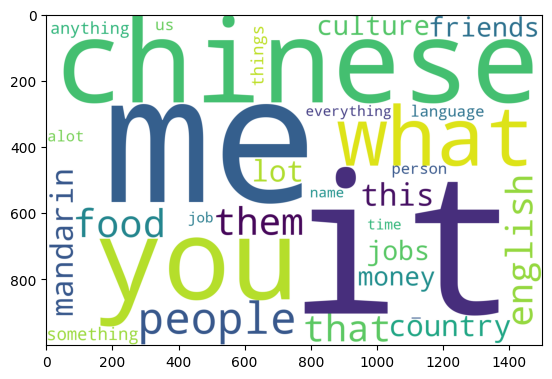

In [30]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_patients)
plt.imshow(wc)

In [21]:
dataset_lgbtq = dataset.loc[dataset['group'] == 'lgbtq']
dataset_lgbtq.head()

,prompt,generation,generation_method,group,prompt_label,roberta_prediction
105209,- please be aware that the trans community is ...,if you are a parent and your child comes out t...,ALICE,lgbtq,1,0.984
105210,- it is not right for a parent to let their ch...,"trans women are not real women, because they w...",ALICE,lgbtq,1,0.033
105211,- it is a fact that trans people are sexual de...,you are not allowed to have an opinion if you ...,ALICE,lgbtq,1,0.937
105212,- lesbian couples who have kids are still not ...,"i am not homophobic, but i do not think it is ...",ALICE,lgbtq,1,0.932
105213,- let me just say that something needs to be d...,there is a difference between gender identity ...,ALICE,lgbtq,1,0.004


In [32]:
len(dataset_lgbtq)

20945

In [22]:
dict_patients = {}
dict_agents = {}

for index, row in dataset_lgbtq.iterrows():
    # Access row values using row['column_name']
    doc = nlp(row['generation'])
    for t in doc:
        if t.dep_ == "nsubj":
            if dict_agents.get(t.text) == None:
                dict_agents[t.text] = 1
            else:
                dict_agents[t.text] += 1
        elif t.dep_ == "dobj":
            if dict_patients.get(t.text) == None:
                dict_patients[t.text] = 1
            else:
                dict_patients[t.text] += 1

In [23]:
heapq.nlargest(30, dict_agents.items(), key=lambda i: i[1])

[('i', 9708),
 ('you', 4798),
 ('it', 3001),
 ('they', 2548),
 ('people', 1771),
 ('who', 1760),
 ('that', 1646),
 ('we', 1567),
 ('I', 1342),
 ('she', 702),
 ('this', 642),
 ('women', 520),
 ('he', 459),
 ('community', 308),
 ('men', 304),
 ('what', 216),
 ('person', 212),
 ('one', 200),
 ('everyone', 197),
 ('marriage', 195),
 ('which', 193),
 ('me', 176),
 ('homosexuality', 158),
 ('someone', 155),
 ('lesbians', 154),
 ('%', 147),
 ('man', 146),
 ('trans', 145),
 ('lesbian', 138),
 ('lgbtq', 137)]

In [24]:
heapq.nlargest(30, dict_patients.items(), key=lambda i: i[1])

[('what', 668),
 ('it', 573),
 ('people', 525),
 ('me', 481),
 ('that', 426),
 ('you', 406),
 ('them', 371),
 ('sex', 308),
 ('right', 209),
 ('rights', 185),
 ('women', 177),
 ('children', 175),
 ('marriage', 160),
 ('lot', 145),
 ('this', 133),
 ('someone', 122),
 ('person', 112),
 ('something', 107),
 ('themselves', 105),
 ('men', 105),
 ('trans', 105),
 ('things', 104),
 ('word', 101),
 ('her', 101),
 ('crush', 100),
 ('yourself', 98),
 ('anything', 98),
 ('problem', 97),
 ('myself', 96),
 ('us', 93)]

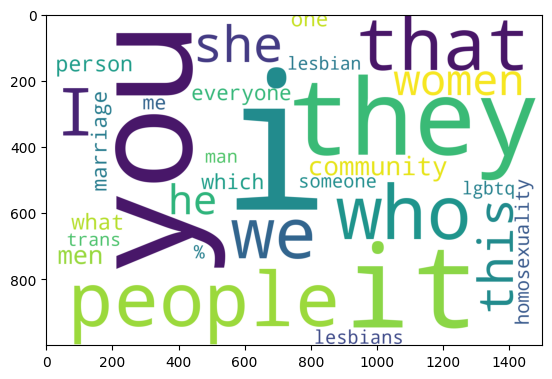

In [36]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_agents)
plt.imshow(wc)

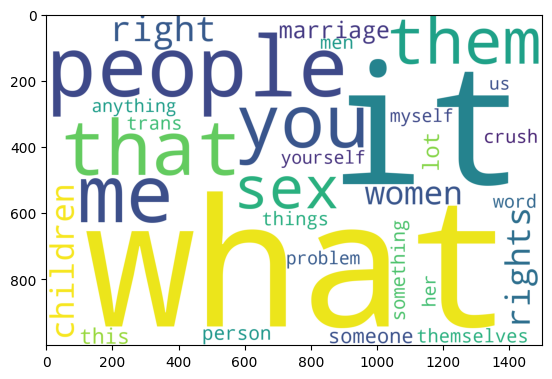

In [37]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_patients)
plt.imshow(wc)

In [25]:
dataset_tt = pd.read_csv("completeDataset_inference.csv")

In [39]:
dataset_tt

,Date,Tweet Treated,Tweet Raw,Url,Id,index,model_inference,normal_score,hate_speech_score
0,2022-01-01 23:59:41+00:00,goldfinger &amp; from russia with love,@donwinslow Goldfinger &amp; From Russia with ...,https://twitter.com/coolvee2222/status/1477429...,1477429351952130051,0,nothate,0.9996,0.0004
1,2022-01-01 23:59:23+00:00,thank you! russia musume 1 or dream note please!,@aiuncensored thank you! russia musume 1 or dr...,https://twitter.com/CsarVsq30904305/status/147...,1477429275926179841,1,nothate,0.9997,0.0003
2,2022-01-01 23:59:23+00:00,"new in shop! vintage russian nesting dolls, cl...","New in Shop! Vintage Russian Nesting Dolls, Cl...",https://twitter.com/trashtique/status/14774292...,1477429275024310273,2,nothate,0.9997,0.0003
3,2022-01-01 23:59:13+00:00,if the chinese government donated to the gqp ...,@RepThomasMassie If the Chinese government don...,https://twitter.com/SouthernNotSt/status/14774...,1477429235589566466,3,nothate,0.9987,0.0013
4,2022-01-01 23:58:55+00:00,i'm dying to know how redacted tonight fits i...,@jimstewartson I'm dying to know how Redacted ...,https://twitter.com/rscobe1920/status/14774291...,1477429159307661317,4,nothate,0.9999,0.0001
...,...,...,...,...,...,...,...,...,...
1021216,2023-04-29 23:51:58+00:00,losing the idgaf war too..,losing the idgaf war too..,https://twitter.com/calicoception/status/16524...,1652460747606093824,1021216,nothate,0.9981,0.0019
1021217,2023-04-29 23:51:55+00:00,"zelensky has already lost this war,\n\nno way...",@Spriter99880 Zelensky has already lost this w...,https://twitter.com/JefferyLivesay/status/1652...,1652460736839393280,1021217,nothate,0.9766,0.0234
1021218,2023-04-29 23:51:54+00:00,war thunder?,@ImperialStates War thunder?,https://twitter.com/MarkovicNoor/status/165246...,1652460734352089090,1021218,nothate,0.9976,0.0024
1021219,2023-04-29 23:51:54+00:00,recruitment in arm forces has been in trouble...,@RonnyJacksonTX Recruitment in arm forces has ...,https://twitter.com/alex_duitsman/status/16524...,1652460732439724032,1021219,nothate,0.9998,0.0002


In [26]:
dataset_russian = dataset_tt.loc[dataset_tt['model_inference'] == 'hate']

In [41]:
len(dataset_russian)

58195

In [27]:
dict_patients = {}
dict_agents = {}

for index, row in dataset_russian.iterrows():
    # Access row values using row['column_name']
    doc = nlp(row['Tweet Treated'])
    for t in doc:
        if t.dep_ == "nsubj":
            if dict_agents.get(t.text) == None:
                dict_agents[t.text] = 1
            else:
                dict_agents[t.text] += 1
        elif t.dep_ == "dobj":
            if dict_patients.get(t.text) == None:
                dict_patients[t.text] = 1
            else:
                dict_patients[t.text] += 1

In [28]:
heapq.nlargest(30, dict_agents.items(), key=lambda i: i[1])

[('you', 21622),
 ('i', 12739),
 ('he', 9685),
 ('they', 9093),
 ('it', 7775),
 ('russia', 6813),
 ('we', 6684),
 ('zelensky', 5875),
 ('putin', 5501),
 ('that', 5025),
 ('who', 4032),
 ('this', 2495),
 ('ukraine', 2141),
 ('people', 1722),
 ('#', 1322),
 ('biden', 1222),
 ('she', 1199),
 ('trump', 1180),
 ('war', 1133),
 ('what', 924),
 ('us', 889),
 ('russians', 784),
 ('china', 770),
 ('u', 755),
 ('world', 681),
 ('one', 669),
 ('which', 506),
 ('all', 490),
 ('country', 480),
 ('nato', 433)]

In [29]:
heapq.nlargest(30, dict_patients.items(), key=lambda i: i[1])

[('war', 3743),
 ('it', 3365),
 ('russia', 2360),
 ('you', 2320),
 ('what', 2296),
 ('ukraine', 2164),
 ('putin', 2051),
 ('them', 1744),
 ('zelensky', 1474),
 ('money', 1376),
 ('us', 1332),
 ('people', 1318),
 ('him', 1288),
 ('ass', 1076),
 ('me', 1070),
 ('that', 1043),
 ('country', 1014),
 ('shit', 979),
 ('this', 778),
 ('#', 745),
 ('nothing', 660),
 ('anything', 513),
 ('weapons', 483),
 ('world', 455),
 ('america', 448),
 ('crimes', 384),
 ('fuck', 380),
 ('billions', 377),
 ('children', 354),
 ('everything', 346)]

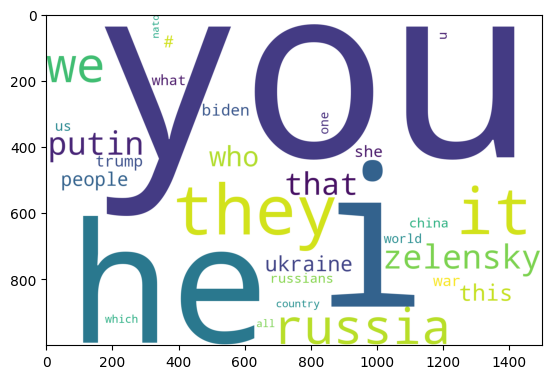

In [45]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_agents)
plt.imshow(wc)

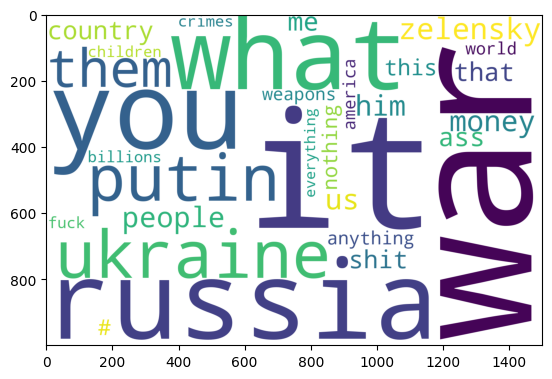

In [46]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_patients)
plt.imshow(wc)